# Decision Trees

- Tree-based learners are fundamentally built on decision trees, where a series of decision rules are connected in a chain.
- The structure resembles an upside-down tree, with the first decision rule at the top (the root) and subsequent rules branching out below.
- In a decision tree:
  - Each decision node represents a decision rule that splits the data into branches.
  - Branches lead to either further decision nodes or to leaves, endpoints that contain the final prediction or output.
- It is possible to construct multiple different trees from the same dataset, depending on how the data is split at each step.

### Example
- Using decision tree to distinguish  between the four animal.
  - Classes:   bears, hawks, penguins, and dolphin
  - Features: feathers, fins, fly.
- The goal is to get the right answer by asking as few if/else questions as possible.ile.


![image.png](attachment:4b70f7b9-7e01-49d8-b272-5d17f57f0a32.png)

### Node Impurity
- Node impurity means how mixed the classes are in a node.
  - If a node contains only one class, it is called pure, impurity = 0.
  - If a node contains a mix of classes, it is highly impure.
- The goal in building a decision tree is: At each split, try to reduce impurity as much as possible.
- Leaf nodes (final points) should ideally be pure: containing only one class.

### Information Gain
- Impurity of a node is measured through a metric called information gain.
- A decision tree chooses the feature that gives the maximum Information Gain for a node.
- Information Gain = Impurity before split – Weighted impurity after split
  - High Information Gain → Good split (data becomes more pure)
  - Low Information Gain → Bad split (data remains mixed/impure)

### Cost Functions
- Information Gain measures how well a given feature separates the training examples according to their target classification, helping to choose the best splits at each decision node.
- Information Gain can be calculated using different metrics:
  - Entropy, which measures the impurity or randomness in the data, value ranges between 0 and 1.
  - Gini Index, which measures the probability of incorrectly classifying a randomly chosen element, value ranges between 0 and 0.5.
- In practice, Gini Index is slightly faster to compute because it doesn't involve logarithms.

### Overfitting in Decision Trees
- Decision trees are highly prone to overfitting.
- Decision-tree learners can create overfitting and:
  - over-complex trees
  - very deep trees
- Depth of a decision tree can be controlled by the 'Max Depth' hyperparameter.
  - This hyperparameter sets the maximum number of layers (levels) a decision tree can grow during training.
- Also, decision trees can be unstable because small variations in the data might result in a completely different tree being generated.


### Unpruned Tree
- An unpruned decision tree is a tree that is grown fully without applying any restrictions to stop its growth early.
- It keeps splitting nodes until:
  - Each leaf is pure (only one class remains), or
  - There are no more features left to split.

### Other Properties
- Does not involve any training of parameters – a non-parametric method.
- Can be used for both classification as well as regression.
- No preprocessing required for data; can directly use categorical data.l data.


In [2]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

## Loading and Preprocessing Dataset

In [ ]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [ ]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Splitting into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.50,random_state=0)
print('X_train.shape',X_train.shape)
print('X_test.shape',X_test.shape)
print('Y_train.shape',Y_train.shape)
print('Y_test.shape',Y_test.shape)

X_train.shape (75, 4)
X_test.shape (75, 4)
Y_train.shape (75,)
Y_test.shape (75,)


## Training a Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree classifier object
decisiontree_1 = DecisionTreeClassifier(random_state=0)
# Train model
decisiontree_1 = decisiontree_1.fit(X_train, Y_train)
# Predict observation's class
Y_pred_1 = decisiontree_1.predict(X_test)
Y_pred_1

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

In [ ]:
# Display the metrics
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_1)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_1))
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(Y_test, Y_pred_1, target_names=target_names))

The accuracy is 96.0%
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        21
     class 1       0.94      0.97      0.95        30
     class 2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [ ]:
# Displaying detailed metrics
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_1)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_1))
print()
print('Precision: ',metrics.precision_score(Y_test, Y_pred_1, average=None))
print('Micro Precision: ',metrics.precision_score(Y_test, Y_pred_1, average='micro'))
print('Macro Precision: ',metrics.precision_score(Y_test, Y_pred_1, average='macro'))
print('Weighted Precision: ',metrics.precision_score(Y_test, Y_pred_1, average='weighted'))
print()
print('Recall score: ',metrics.recall_score(Y_test, Y_pred_1, average=None))
print('Micro Recall score: ',metrics.recall_score(Y_test, Y_pred_1, average='micro'))
print('Macro Recall score: ',metrics.recall_score(Y_test, Y_pred_1, average='macro'))
print('Weighted Recall score: ',metrics.recall_score(Y_test, Y_pred_1, average='weighted'))
print()
print('F1 score: ',metrics.f1_score(Y_test, Y_pred_1, average=None))
print('Micro F1 score: ',metrics.f1_score(Y_test, Y_pred_1, average='micro'))
print('Macro F1 score: ',metrics.f1_score(Y_test, Y_pred_1, average='macro'))
print('Weighted F1 score: ', metrics.f1_score(Y_test, Y_pred_1, average='weighted'))

The accuracy is 96.0%
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]

Precision:  [1.         0.93548387 0.95652174]
Micro Precision:  0.96
Macro Precision:  0.9640018700327255
Weighted Precision:  0.9602805049088359

Recall score:  [1.         0.96666667 0.91666667]
Micro Recall score:  0.96
Macro Recall score:  0.9611111111111111
Weighted Recall score:  0.96

F1 score:  [1.         0.95081967 0.93617021]
Micro F1 score:  0.96
Macro F1 score:  0.9623299616323684
Weighted F1 score:  0.9599023369375654


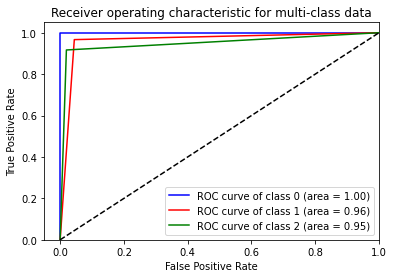

In [ ]:
# Displaying ROC
# ROC curve is usually for binary classification.
# If you have multi-class classification (more than 2 classes), you can still plot ROC one vs all (per class).

from sklearn.preprocessing import label_binarize
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=3
Y_testt=label_binarize(Y_test, classes=[0, 1, 2])
Y_predd=label_binarize(Y_pred_1, classes=[0, 1, 2])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_testt[:, i], Y_predd[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

## Visualizing a Decision Tree Model

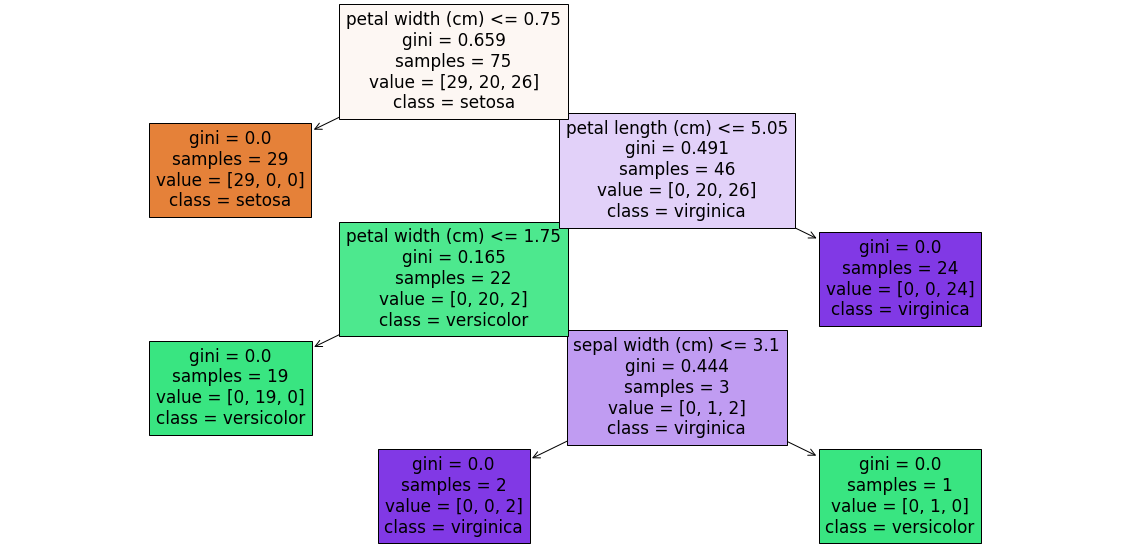

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(decisiontree_1, filled=True,
               feature_names=iris.feature_names,
               class_names=iris.target_names)
plt.show()

## Trying Different Hyperparameters

In [ ]:
# Create decision tree classifier object using entropy
decisiontree_2 = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train model
decisiontree_2 = decisiontree_2.fit(X_train, Y_train)
Y_pred_2 = decisiontree_2.predict(X_test)

# Displaying detailed metrics
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_2)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_2))

The accuracy is 96.0%
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


In [ ]:
# Create decision tree classifier object using depth 4
decisiontree_3 = DecisionTreeClassifier(max_depth=4, random_state=0)

# Train model
decisiontree_3 = decisiontree_2.fit(X_train, Y_train)
Y_pred_3 = decisiontree_2.predict(X_test)

# Displaying detailed metrics
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_3)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_3))

The accuracy is 96.0%
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
